In [2]:
from PIL import Image
import torchvision
import torch
from torchvision import transforms

# Creating binary masks

Images for segmentation tasks are typically annotated with pixel-level masks.

you will use the corresponding mask to segment the cat out of the image. First, you will need to load the mask and binarize it.

* Load the mask image stored in annotations/Egyptian_Mau_123.png and assign it to mask.
* Create a binary_mask from mask_tensor where each pixel equal to 1/255 is assigned a tensor value of 1.0, and the remaining pixels are assigned a tensor value of 0.0.

In [11]:
# Load mask image
image = Image.open("/kaggle/input/coco-dataset-tutorial-image-segmentation/81922.jpg")
mask = Image.open("/kaggle/input/coco-dataset-tutorial-image-segmentation/81922_annotated.jpg")

# Transform mask to tensor
transform = transforms.Compose([transforms.ToTensor()])

image_tensor = transform(image)
mask_tensor = transform(mask)
print(f"""Image Shape :{image_tensor.shape}
      Mask shape:{mask_tensor.shape}""")

# Create binary mask
binary_mask = torch.where(
    mask_tensor == 1/255, 
    torch.tensor(1.0),
    torch.tensor(0.0),
)

# Print unique mask values
print(binary_mask.unique())

Image Shape :torch.Size([3, 330, 496])
      Mask shape:torch.Size([3, 330, 496])
tensor([0., 1.])


It's important to remember that the toTensor() transformation normalizes the pixel values by dividing them by 255. Now that you can binarize a segmentation mask, let's use it to segment an image!

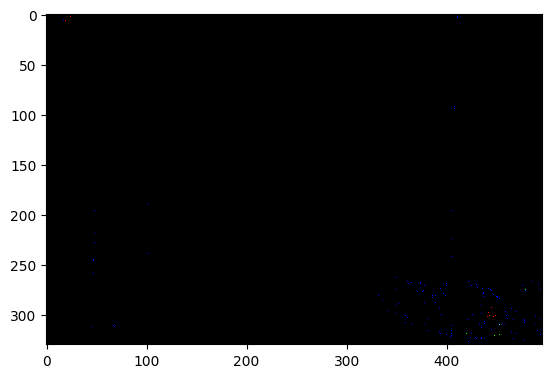

In [12]:
import matplotlib.pyplot as plt

to_pil_image = transforms.ToPILImage()
mask = to_pil_image(binary_mask)
plt.imshow(mask)

# Segmenting image with a mask

With the binary mask ready, you can use it to segment the object, that is the cat, out of the image.

To do so, you will need to load the original image and transform it to a tensor. Next, you will create the object tensor by masking the original image. Finally, you will display the result.

* Create image_tensor by applying the toTensor() transform to the raw image.
* Segment the image by masking the image_tensor with the binary_mask, assigning the result to object_tensor.
* Apply the already defined to_pil_image transform to the object_tensor in order to display it.

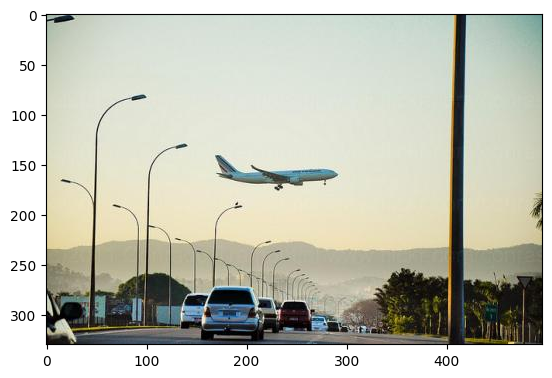

In [13]:
# Load image and transform to tensor
# image = Image.open("images/Egyptian_Mau_123.jpg")
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image)

# Segment object out of the image
object_tensor = image_tensor + binary_mask

# Convert segmented object to image and display
to_pil_image = transforms.ToPILImage()
object_image = to_pil_image(object_tensor)
plt.imshow(object_image)
plt.show()

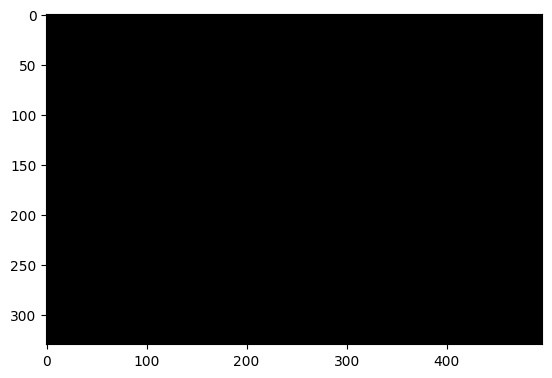

In [14]:
# Load image and transform to tensor
# image = Image.open("images/Egyptian_Mau_123.jpg")
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image)

# Segment object out of the image
object_tensor = image_tensor * binary_mask

# Convert segmented object to image and display
to_pil_image = transforms.ToPILImage()
object_image = to_pil_image(object_tensor)
plt.imshow(object_image)
plt.show()

You know how annotation masks work for image segmentation. Now, let's look at how to use machine learning models to predict those masks for unlabeled images!

# Segmenting with pre-trained Mask R-CNN

In this exercise, you will use the pre-trained Mask R-CNN model to perform instance segmentation

The model you will use has been pre-trained on the COCO dataset, which contains images of common objects, including animals. Thanks to this, the model should be able to recognize cats out of the box, without the need to fine-tune it.

* Import maskrcnn_resnet50_fpn from the appropriate torchvision module.
* Load the pretrained Mask R-CNN to model.
* Transform the two cats image to a tensor and unsqueeze it.
* Perform inference by passing the image to the model and assign the output to prediction.

In [25]:
# Import maskrcnn_resnet50_fpn
from torchvision.models.detection import maskrcnn_resnet50_fpn

# Load a pre-trained Mask R-CNN model
model = maskrcnn_resnet50_fpn(pretrained = True)
model.eval()

# Load an image and convert to a tensor
image = Image.open("/kaggle/input/two-cats/cat2.jpg")
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    prediction = model(image_tensor)
    print(prediction)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[{'boxes': tensor([[  0.0000,  39.5686, 316.3622, 360.0000],
        [243.6985,  25.0372, 446.0628, 360.0000],
        [138.7443,  29.4071, 353.3853, 357.0645],
        [  0.0000, 131.3159, 539.5195, 348.4940],
        [  0.0000, 226.6524, 540.0000, 359.7739]]), 'labels': tensor([17, 17, 17, 63, 15]), 'scores': tensor([0.9921, 0.9856, 0.3336, 0.0949, 0.0831]), 'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0972, 0.1138, 0.1305,  ..., 0.0000, 0.0000, 0.0000],
          [0.0861, 0.1008, 0.1156,  ..., 0.0000, 0.0000, 0.0000],
          [0.0750, 0.0879, 0.1007,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,


 Using the pre-trained Mask R-CNN is very convenient: just load it, prepare the input image, and run inference! Let's analyze the prediction in greater detail next.

**MOdel Outputs**

In [26]:
prediction[0]["labels"]

tensor([17, 17, 17, 63, 15])

class_names[17] -> cat

In [27]:
prediction[0]["scores"]

tensor([0.9921, 0.9856, 0.3336, 0.0949, 0.0831])

In [28]:
prediction[0]["masks"]

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0972, 0.1138, 0.1305,  ..., 0.0000, 0.0000, 0.0000],
          [0.0861, 0.1008, 0.1156,  ..., 0.0000, 0.0000, 0.0000],
          [0.0750, 0.0879, 0.1007,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [29]:
prediction[0]["masks"].unique()

tensor([0.0000e+00, 4.3554e-06, 4.9899e-06,  ..., 9.9971e-01, 9.9971e-01,
        9.9971e-01])

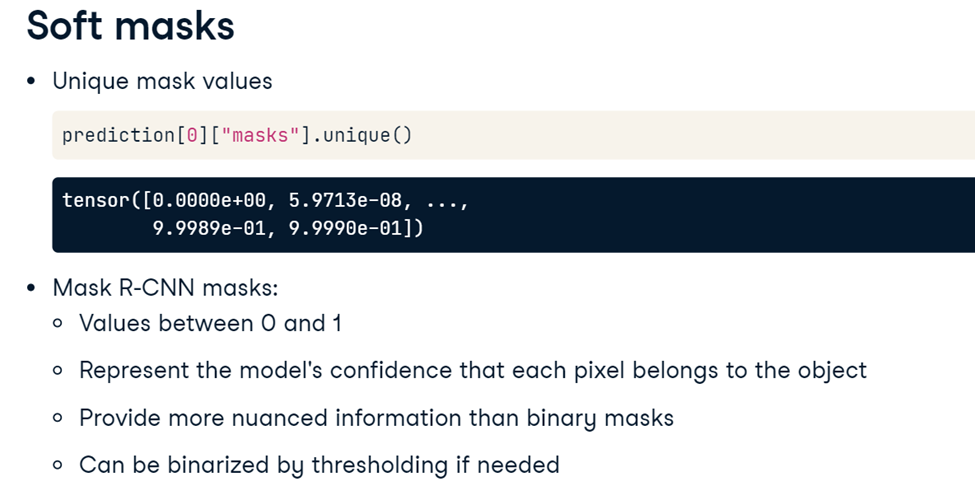!

# Displaying soft masks

In the previous exercise, you have learned that the top two most likely objects the Mask R-CNN model has segmented are both cats. Now, you will display the masks for these two cats overlaid on top of the original image to visually verify their accuracy. This will require iterating over the two masks, and for each of them, plotting the original image followed by a semi-transparent mask on top of it.

* Extract masks and labels from the prediction, assigning them to masks and labels, respectively.
* Inside the for-loop, display the i-th mask over the image by passing mask[i, 0] to the plotting function, using the "jet" color map and setting the transparency parameter to 0.5.

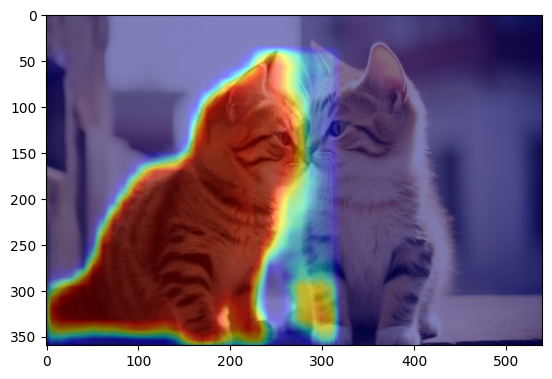

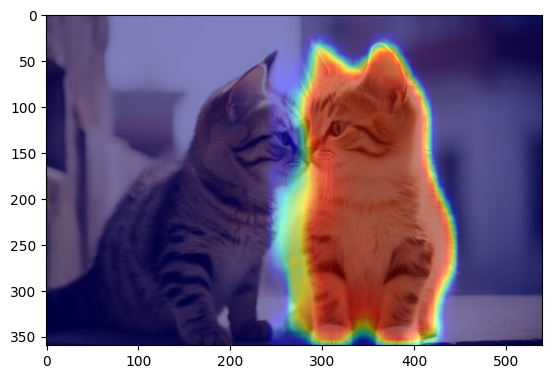

In [30]:
# Extract masks and labels from prediction
masks = prediction[0]["masks"]
labels = prediction[0]["labels"]

# Plot image with two overlaid masks
for i in range(2):
    plt.imshow(image)
    # Overlay the i-th mask on top of the image
    plt.imshow(masks[i, 0],cmap = "jet", alpha = 0.5)
#     plt.title(f"Object: {class_names[labels[i]]}")
    plt.show()

Make sure to toggle between the two images you have drawn, one for each of the top two masks. Since this is intance segmentation, each instance of a cat was assigned a separate mask. Let's learn about semantic segmentation next!